In [1]:
#importing necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')

# Basic Checks 

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Data Cleaning 

In [8]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.rename(columns={'v1': 'target' , 'v2': 'text'}, inplace = True)
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Label Encoding 

In [11]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [12]:
data['target'] = lb.fit_transform(data['target'])

In [13]:
data.target

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [14]:
#checking null values
data.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#checking dublicate values 
data.duplicated().sum()

403

In [16]:
#removing duplicate values
data = data.drop_duplicates(keep = 'first')

In [17]:
#checking duplicate value is present or not 
data.duplicated().sum()

0

In [18]:
data.shape

(5169, 2)

#Normalize Text: Convert text to lowercase, remove punctuation, and strip whitespace.

In [19]:
import re

Convert to Lowercase: text.lower()

Remove Punctuation:re.sub(r'[^\w\s]', '', text)

Strip Whitespace:text.strip()

In [20]:
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Strip leading and trailing whitespace
    text = text.strip()
    return text

In [21]:
data['normalized_text'] = data['text'].apply(normalize_text)

# Display the first few rows to check
print(data.head())

   target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

                                     normalized_text  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in 2 a wkly comp to win fa cup fina...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  


C:\Users\HP\AppData\Local\Temp\ipykernel_4732\276363780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalized_text'] = data['text'].apply(normalize_text)


In [22]:
data.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [23]:
data.drop(columns=['text'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4732\96740640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['text'], inplace=True)


# Expolatory Data Anlaysis 

In [24]:
data.head()

,target,normalized_text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [25]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

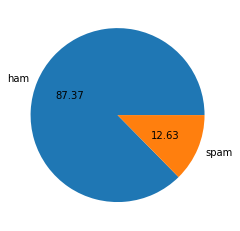

In [26]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Insight from the graph: 
The data is imbalanced. Hence, we have ham as 87.37 and rest of spam

# Data Preprocessing 

# Script for Text Normalization and Processing:

In [27]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data['num_characters'] = data['normalized_text'].apply(len)

C:\Users\HP\AppData\Local\Temp\ipykernel_4732\2916934800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['normalized_text'].apply(len)


In [29]:
# num of words
data['num_words'] = data['normalized_text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_4732\177796996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['normalized_text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [30]:
#num of sentence
data['num_sentences'] = data['normalized_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_4732\3144110228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['normalized_text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
data.head()

,target,normalized_text,num_characters,num_words,num_sentences
0,0,go until jurong point crazy available only in ...,102,20,1
1,0,ok lar joking wif u oni,23,6,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,149,28,1
3,0,u dun say so early hor u c already then say,43,11,1
4,0,nah i dont think he goes to usf he lives aroun...,59,13,1


In [32]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,74.759915,15.153608,0.999613
std,55.536723,10.855689,0.019668
min,0.000000,0.000000,0.000000
25%,33.000000,7.000000,1.000000
50%,57.000000,12.000000,1.000000
75%,111.000000,22.000000,1.000000
max,888.000000,171.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   target           5169 non-null   int32 
 1   normalized_text  5169 non-null   object
 2   num_characters   5169 non-null   int64 
 3   num_words        5169 non-null   int64 
 4   num_sentences    5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


# Bivariant Analysis 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

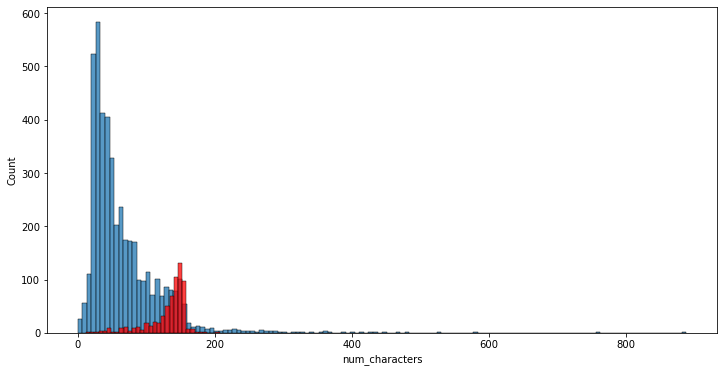

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

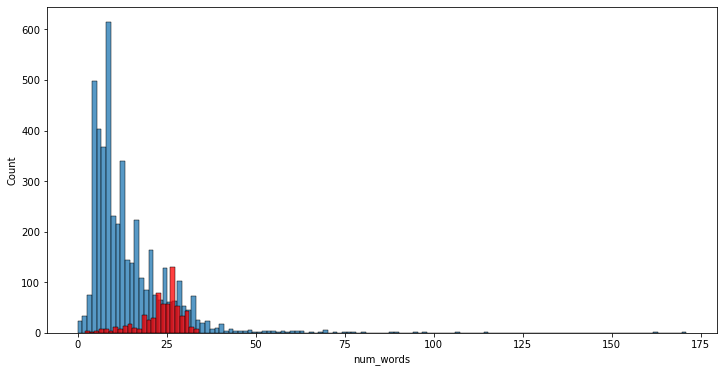

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

# Multivariant Analysis 

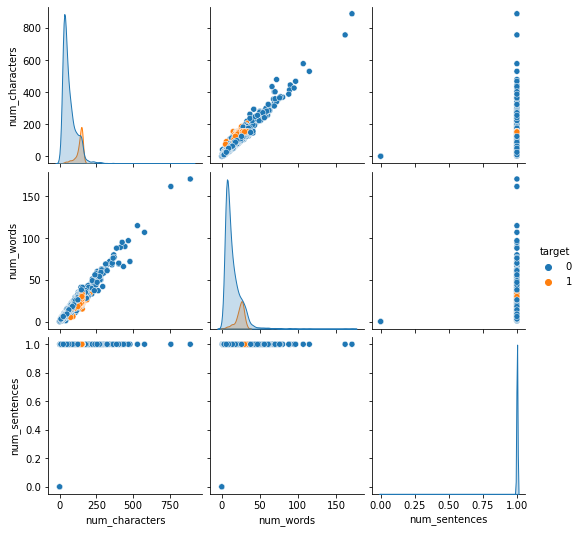

In [36]:
sns.pairplot(data,hue='target')

<AxesSubplot:>

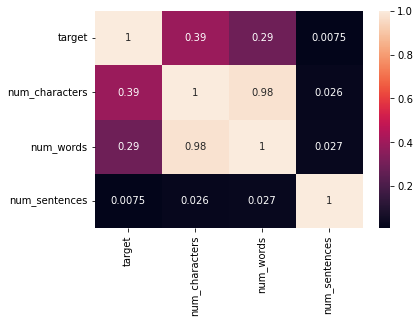

In [37]:
sns.heatmap(data.corr(),annot=True)

# Model Building 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(data['normalized_text']).toarray()

In [48]:
X.shape

(5169, 3000)

In [49]:
y = data['target'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)


In [58]:
y_pred1

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

# GaussianNB

In [61]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8810444874274661
[[795 101]
 [ 22 116]]
0.5345622119815668


# MultinomialNB

In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


# BernoulliNB

In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737


# Model Creation of LR,SVC,MNB,DTC,KNC,RFC,ADC,BC,ETC,GBC,XGBC

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9468085106382979
Precision -  0.8952380952380953
For  LR
Accuracy -  0.9516441005802708
Precision -  0.9150943396226415
For  RF
Accuracy -  0.971953578336557
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9393939393939394
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492


In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [71]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.970019,1.000000
5,RF,0.971954,0.990991
10,xgb,0.980658,0.983607
8,ETC,0.976789,0.983051
0,SVC,0.977756,0.975207
6,AdaBoost,0.971954,0.973913
9,GBDT,0.950677,0.939394
7,BgC,0.963250,0.916667
4,LR,0.951644,0.915094


In [72]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.970019
2,RF,Accuracy,0.971954
3,xgb,Accuracy,0.980658
4,ETC,Accuracy,0.976789
5,SVC,Accuracy,0.977756
6,AdaBoost,Accuracy,0.971954
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.963250
9,LR,Accuracy,0.951644


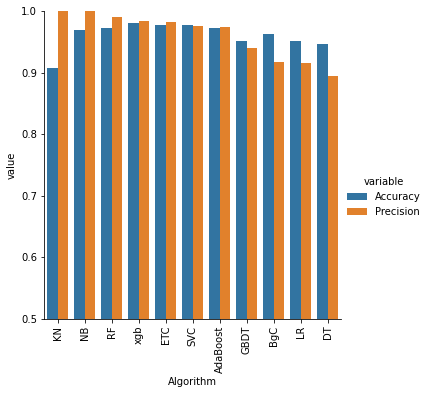

In [73]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

XGBoost Classifier gives best accuracy 98.06 %.

